<a href="https://colab.research.google.com/github/RhythmBindal/Linear-Regression-model-of-Pre-owned-Car-s-data/blob/main/Linear_Regression_model_of_Pre_owned_Car's_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Loading the Raw Data


In [2]:
raw_data = pd.read_csv("1.04.+Real-life+example.csv")

In [3]:
raw_data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


# **PreProcessing**

In [4]:
 raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


**Determining Variables of interest and dropping the ones of least**



In [5]:
data = raw_data.drop(['Model'],axis=1)
#axis=0 -> Rows to be dropped , axis=1 -> Columns to be dropped
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


**Dealing With Missing Values**

In [6]:
data.isnull().sum()    #data.isnull() -> true -> Missing Values , sum -> Gives the sum of all the missing values
data_no_mv = data.dropna(axis=0)
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


**Exploring The PDFs**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


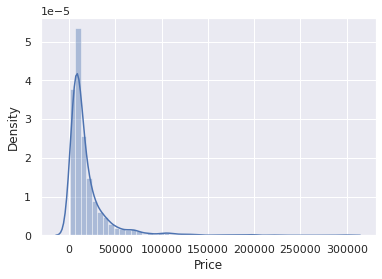

In [7]:
sns.distplot(data_no_mv['Price'])

**Dealing With Outliers**

In [8]:
q = data_no_mv['Price'].quantile(0.99) #removing the outliers
data_1 = data_no_mv[data_no_mv['Price']<q]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


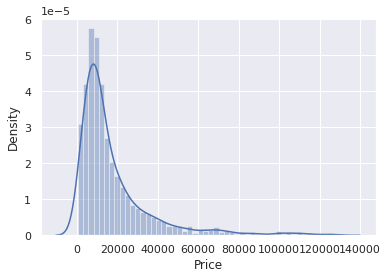

In [9]:
sns.distplot(data_1['Price'])

In [10]:
#Can do the same process for others factors like Mileage and EngineV

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


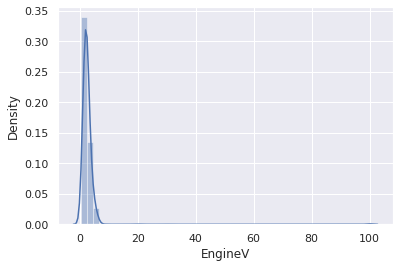

In [11]:
sns.distplot(data_no_mv['EngineV'])

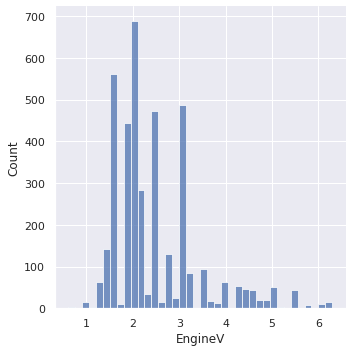

In [12]:
data_2 =data_1[data_1['EngineV']<6.5]
sns.displot(data_2['EngineV'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


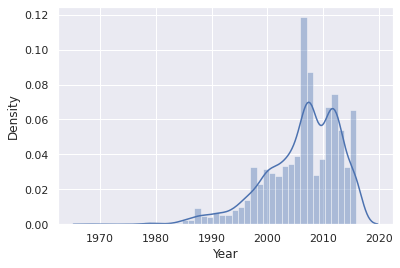

In [13]:
sns.distplot(data_no_mv['Year'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


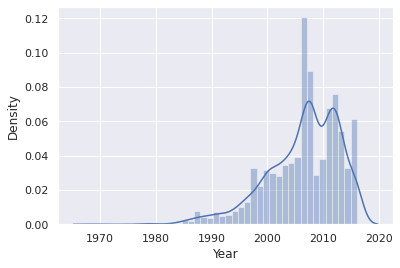

In [14]:
q = data_2['Price'].quantile(0.01) 
data_3 = data_2[data_2['Price']>q]
sns.distplot(data_3['Year'])

In [15]:
data_cleaned = data_3.reset_index(drop=True)
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3921,3921.000000,3921,3921.000000,3921.000000,3921,3921,3921.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,859,NaN,1499,NaN,NaN,1833,3577,NaN
mean,NaN,18059.551801,NaN,164.511859,2.448776,NaN,NaN,2006.459832
std,NaN,19032.067325,NaN,102.826791,0.946786,NaN,NaN,6.509803
min,NaN,1600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,159.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21500.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


**Checking OLS Assumptions**

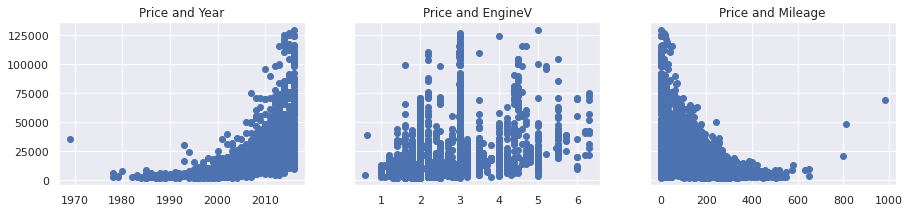

In [16]:
f, (ax1,ax2,ax3) = plt.subplots(1,3,sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')
plt.show()

Using log transformation to deal with exponential plots

In [17]:
log_price =np.log(data_cleaned['Price'])
data_cleaned['log_price']= log_price #adding as a column to the data 
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3916,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3917,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3918,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557
3919,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,8.987197


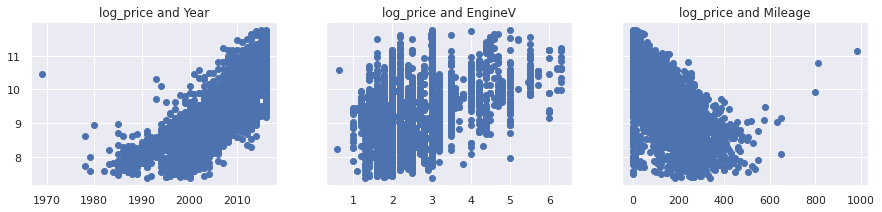

In [18]:
f, (ax1,ax2,ax3) = plt.subplots(1,3,sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('log_price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('log_price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('log_price and Mileage')
plt.show()

In [19]:
data_cleaned = data_cleaned.drop(['Price'],axis=1)

MultiCollinearity

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage','Year','EngineV']] #Variables we want to check for multicolliearity 
vif= pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range (variables.shape[1])]
vif["features"] = variables.columns
vif

,VIF,features
0,3.535636,Mileage
1,10.161068,Year
2,7.690306,EngineV


In [21]:
data_no_multicollinearity = data_cleaned.drop(['Year'],axis=1)

**Creating Dummy Variables**

In [22]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [23]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [24]:
cols = ['log_price','Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()
      

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


## **LINEAR REGRESSION MODEL**

**Declaring the inputs and the targets**

In [25]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'],axis=1)

**Scaling the data**

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [27]:
inputs_scaled = scaler.transform(inputs)

**Train Test Split**

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2 , random_state=365) ##0.2 --> 80-20 split 

**Create the Regression**

In [29]:
reg = LinearRegression()
reg.fit(x_train, y_train)


LinearRegression()

In [30]:
y_hat = reg.predict(x_train) #To check the final result, plotting the predicted values against the observed values(targets)

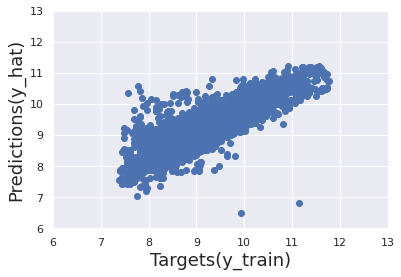

In [31]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets(y_train)',size=18)
plt.ylabel('Predictions(y_hat)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()


Text(0.5, 1.0, 'Residuals PDF')

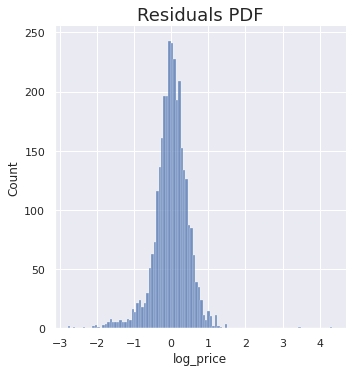

In [32]:
sns.displot(y_train-y_hat)
plt.title("Residuals PDF", size=18)

Longer tail on the negative side, meaning for certain observations, (y_train-y_hat) is much lower than the mean, meaning those predictions tend to overestimate the targets

In [33]:
reg.score(x_train, y_train)

0.7141930223689907

**Finding the Weights and Bias**

In [34]:
reg.intercept_


9.407792778835955

In [35]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights']=reg.coef_
reg_summary 

,Features,Weights
0,Mileage,-0.444885
1,EngineV,0.206287
2,Brand_BMW,0.020136
3,Brand_Mercedes-Benz,0.015891
4,Brand_Mitsubishi,-0.124200
5,Brand_Renault,-0.172929
6,Brand_Toyota,-0.040909
7,Brand_Volkswagen,-0.070959
8,Body_hatch,-0.161429
9,Body_other,-0.099991


For Continuous variables :

+ve weight --> as the value of feature inc., so do the log_price and price respectively

-ve weight --> vica versa

For Dummy variables :

+ve value --> Showing that the respective brand is more expensive than the benchmark(Audi)

-ve value --> vica versa

##**Testing**

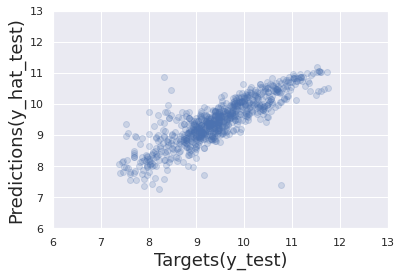

In [36]:
y_hat_test = reg.predict(x_test)
plt.scatter(y_test, y_hat_test, alpha=0.2) #alpha showing the proportional opacity of the points
plt.xlabel('Targets(y_test)',size=18)
plt.ylabel('Predictions(y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()


In [37]:
df_perf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_perf.head()

,Prediction
0,3083.163220
1,23021.818732
2,12310.228745
3,14865.642642
4,5684.746549


In [38]:
df_perf['Target'] = np.exp(y_test)
df_perf

,Prediction,Target
0,3083.163220,NaN
1,23021.818732,7900.0
2,12310.228745,NaN
3,14865.642642,NaN
4,5684.746549,NaN
...,...,...
780,3073.482371,NaN
781,7683.880664,NaN
782,21030.789736,NaN
783,19806.682764,NaN


In [39]:
y_test = y_test.reset_index(drop=True)
y_test.head()

0     8.116716
1     9.893437
2    10.448715
3     9.104869
4     8.006034
Name: log_price, dtype: float64

In [40]:
df_perf['Target'] = np.exp(y_test)
df_perf

,Prediction,Target
0,3083.163220,3350.0
1,23021.818732,19800.0
2,12310.228745,34500.0
3,14865.642642,8999.0
4,5684.746549,2999.0
...,...,...
780,3073.482371,3100.0
781,7683.880664,4100.0
782,21030.789736,16300.0
783,19806.682764,12800.0


In [41]:
df_perf['Residual'] = df_perf['Target']-df_perf['Prediction']
df_perf['Difference%']= np.absolute(df_perf['Residual']/df_perf['Target']*100)
df_perf

,Prediction,Target,Residual,Difference%
0,3083.163220,3350.0,266.836780,7.965277
1,23021.818732,19800.0,-3221.818732,16.271812
2,12310.228745,34500.0,22189.771255,64.318178
3,14865.642642,8999.0,-5866.642642,65.192162
4,5684.746549,2999.0,-2685.746549,89.554737
...,...,...,...,...
780,3073.482371,3100.0,26.517629,0.855407
781,7683.880664,4100.0,-3583.880664,87.411724
782,21030.789736,16300.0,-4730.789736,29.023250
783,19806.682764,12800.0,-7006.682764,54.739709


In [42]:
df_perf.describe()

,Prediction,Target,Residual,Difference%
count,785.000000,785.000000,785.000000,785.000000
mean,16271.271204,18523.200408,2251.929204,36.873320
std,12324.015138,19187.350872,10804.479720,65.308510
min,1414.451417,1600.000000,-47675.069551,0.050352
25%,7836.280132,7300.000000,-2295.482754,12.093025
50%,12566.283937,11950.000000,49.344571,24.159691
75%,21030.789736,21900.000000,3515.268382,39.972290
max,73130.434141,126000.000000,89080.127922,1162.806574
